In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'darkgrid')

In [2]:
data = pd.read_csv('datasoapui.txt',encoding = "ISO-8859-1")

In [3]:
data.tail()

,date,threads,elapsed,min,max,avg,last,cnt,tps,bytes,bps,err,reason,remove
3264,Sun Jun 27 00:49:00 CEST 2021,896,8975608,1897,685679,81503.4,432747,116,0.01,420525567,60132,21,9054270,Interval
3265,Sun Jun 27 00:49:04 CEST 2021,896,8979701,1897,685679,81503.4,432747,116,0.01,420525567,60132,21,9054270,Interval
3266,Sun Jun 27 00:49:08 CEST 2021,896,8983826,1897,685679,81503.4,432747,116,0.01,420525567,60132,21,9054270,Interval
3267,Sun Jun 27 00:49:12 CEST 2021,896,8987823,1897,685679,81503.4,432747,116,0.01,420525567,60132,21,9054270,Interval
3268,Sun Jun 27 00:52:13 CEST 2021,896,9098899,1897,685679,81503.4,432747,116,0.01,420525567,60132,21,9054270,Interval


In [4]:
data.query("err != 0").head()

,date,threads,elapsed,min,max,avg,last,cnt,tps,bytes,bps,err,reason,remove
3200,Sun Jun 27 00:39:09 CEST 2021,836,8371113,1897,506162,17767.87,375941,97,0.01,379750369,74423,2,1323360,Interval
3201,Sun Jun 27 00:39:14 CEST 2021,836,8389572,1897,506162,17767.87,375941,97,0.01,379750369,74423,2,1323360,Interval
3202,Sun Jun 27 00:39:28 CEST 2021,836,8394086,1897,506162,17767.87,375941,97,0.01,379750369,74423,2,1323360,Interval
3203,Sun Jun 27 00:39:32 CEST 2021,836,8407436,1897,506162,17767.87,375941,97,0.01,379750369,74423,2,1323360,Interval
3204,Sun Jun 27 00:39:36 CEST 2021,836,8411868,1897,506162,17767.87,375941,97,0.01,379750369,74423,2,1323360,Interval


In [5]:
379750369/(1024*1024)

362.1581735610962

In [6]:
74423/1024

72.6787109375

Text(3200, 836, '--- 836')

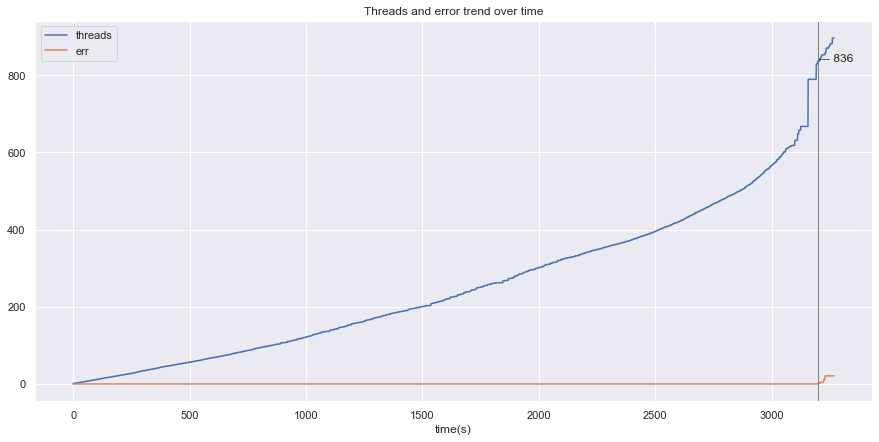

In [7]:
data[['threads','err']].plot(figsize=(15,7), title='Threads and error trend over time', xlabel = 'time(s)')
#plt.vlines(3200,0,836,color='red')
plt.axvline(3200, c = 'gray', lw = 1)
plt.text(3200,836,'--- 836')


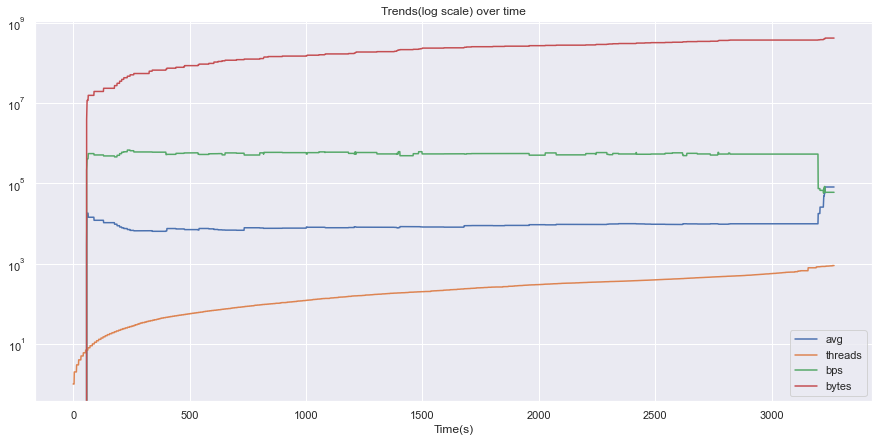

In [8]:
data[['avg','threads','bps','bytes']].plot(figsize=(15,7), title='Trends(log scale) over time', xlabel = 'Time(s)')
plt.yscale('log')

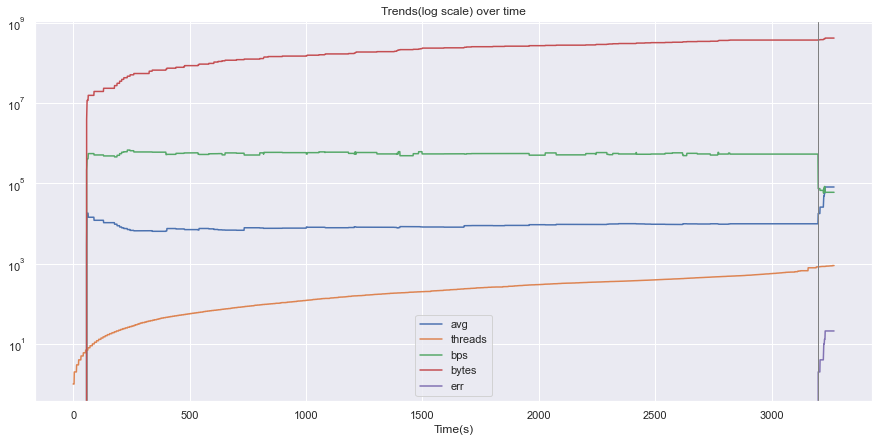

In [21]:
data[['avg','threads','bps','bytes','err']].plot(figsize=(15,7), title='Trends(log scale) over time', xlabel = 'Time(s)')
plt.axvline(3200, c = 'gray', lw = 1)
plt.yscale('log')

In [9]:
data[['avg','bytes','bps','err']].describe()

,avg,bytes,bps,err
count,3269.000000,3.269000e+03,3269.000000,3269.000000
mean,9655.900459,2.234492e+08,533603.888345,0.297033
std,8417.725502,1.123400e+08,105790.969231,2.349417
min,0.000000,0.000000e+00,0.000000,0.000000
25%,7852.870000,1.298119e+08,538938.000000,0.000000
50%,8910.750000,2.404053e+08,546343.000000,0.000000
75%,9749.220000,3.156464e+08,579134.000000,0.000000
max,81503.400000,4.205256e+08,678458.000000,21.000000


In [10]:
4.205256e+08/(1024*1024)

401.0444641113281

In [11]:
533603.888345/1024

521.097547211914

In [12]:
dt = data[['avg','bytes','bps','err']]

In [13]:
burst = pd.read_csv('burst.txt',encoding = "ISO-8859-1")
simple = pd.read_csv('simple.txt',encoding = "ISO-8859-1")

In [14]:
burst.head()

,date,threads,elapsed,min,max,avg,last,cnt,tps,bytes,bps,err,reason,remove
0,Sun Jun 27 10:15:56 CEST 2021,0,1004,0,0,0.0,0,0,0.0,0,0,0,0,Interval
1,Sun Jun 27 10:15:57 CEST 2021,0,2015,0,0,0.0,0,0,0.0,0,0,0,0,Interval
2,Sun Jun 27 10:15:58 CEST 2021,0,3015,0,0,0.0,0,0,0.0,0,0,0,0,Interval
3,Sun Jun 27 10:15:59 CEST 2021,0,4016,0,0,0.0,0,0,0.0,0,0,0,0,Interval
4,Sun Jun 27 10:16:00 CEST 2021,0,5017,0,0,0.0,0,0,0.0,0,0,0,0,Interval


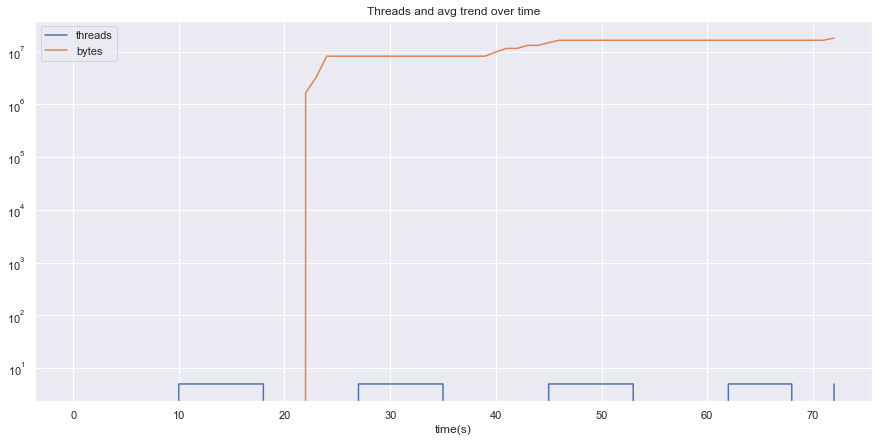

In [15]:
burst[['threads','bytes']].plot(figsize=(15,7), title='Threads and avg trend over time', xlabel = 'time(s)')
plt.yscale('log')

<AxesSubplot:title={'center':'Threads and avg trend over time'}, xlabel='time(s)'>

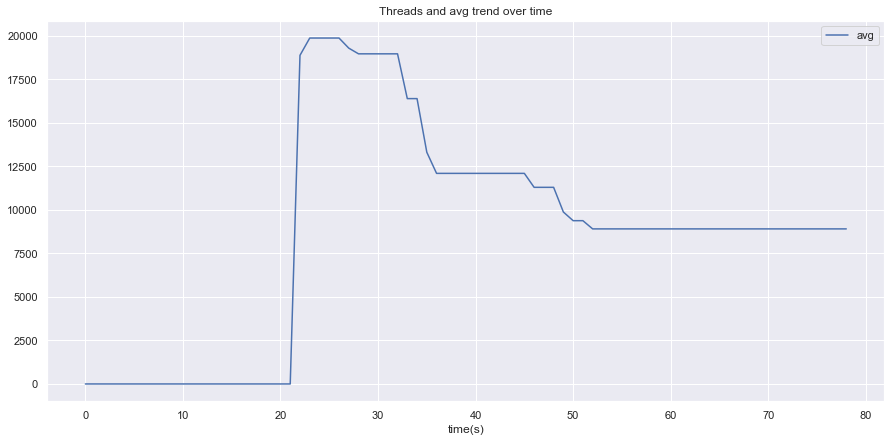

In [16]:
simple[['avg']].plot(figsize=(15,7), title='Threads and avg trend over time', xlabel = 'time(s)')
#plt.yscale('log')

In [17]:
burst['avg2'] = (simple[['avg']] + burst[['avg']])/2
#burst['threads'] = burst['threads']

<AxesSubplot:title={'center':'Threads and avg trend over time'}, xlabel='time(s)'>

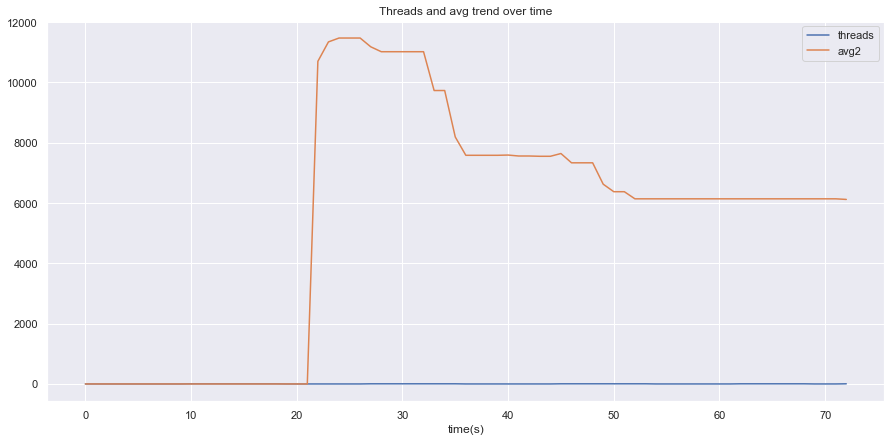

In [18]:
burst[['threads','avg2']].plot(figsize=(15,7), title='Threads and avg trend over time', xlabel = 'time(s)')
#plt.yscale('log')

In [19]:
burst[['avg']]

,avg
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
68,3367.20
69,3367.20
70,3367.20
71,3367.20
